In [1]:
# read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
# describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


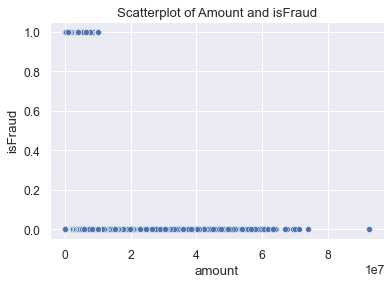

In [13]:
#scatterplot of the amount transaction and isFraud
sns.set(font_scale=1.1)
sns_plot = sns.scatterplot(x = 'amount', y = 'isFraud', data = df).set_title('Scatterplot of Amount and isFraud')

Text(0.5, 1.0, 'Number of transactions by type')

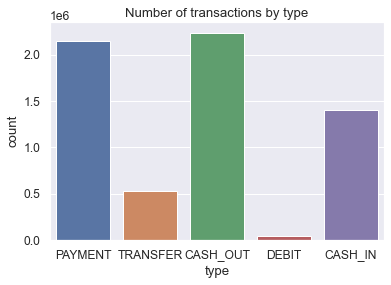

In [12]:
# number of transaction by types
sns.set(font_scale=1.1)
sns.countplot(x = 'type',  data = df).set_title("Number of transactions by type")

Text(0.5, 1.0, 'Number of transactions by type when isFraud = 1')

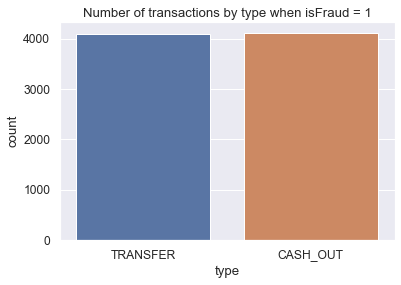

In [15]:
# number of transactions by type for isFraud = 1 
sns.countplot(x = 'type',  data = df.loc[df.isFraud==1]).set_title("Number of transactions by type when isFraud = 1")

Text(0.5, 1.0, 'Number of transactions by type when isFraud = 0')

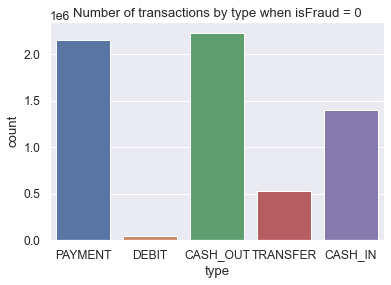

In [16]:
# number of transactions by type for the non fraudulent transactions
sns.countplot(x = 'type',  data = df.loc[df.isFraud==0]).set_title("Number of transactions by type when isFraud = 0")

Text(0.5, 1.0, 'Boxplot of the amount of money used by type when isFraud = 1')

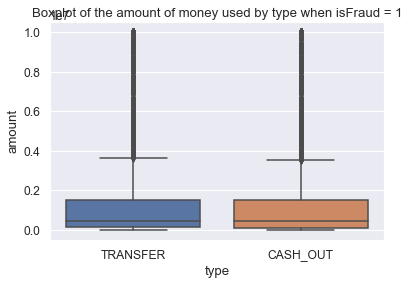

In [18]:
# boxplot of the amount of money used for fraudulent transactions by type
sns.boxplot(x = 'type', y = 'amount', data = df[df.isFraud==1]).set_title("Boxplot of the amount of money used by type when isFraud = 1")

In [62]:
# prepare dataset, drop the columns you are not going to use as a features
df.drop(['nameOrig', 'nameDest', 'step'], axis=1, inplace=True)

In [65]:
# create dummy variables for categorical variable type
tr_types = pd.get_dummies(df.type, prefix='Type')
tr_types.head()

,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [66]:
# join dummy variables with exisiting dataset and drop column type
df = df.join(tr_types)
df.drop(['type'], axis=1, inplace=True)

In [67]:
# check for missing values
df[pd.isnull(df).any(axis=1)]

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER


In [68]:
# create x explanatory variables and y output variable
y = df.isFraud.copy()
X = df.drop(['isFraud','isFlaggedFraud'], axis=1)

In [69]:
# split dataset into train qand test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [70]:
# Logistic regression approach
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
# Test trained model
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [72]:
# Accuarcy results
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9979297836425874
Precision: 0.3636969562319485
Recall: 0.792352371732817


Text(0.5, 11.0, 'Predicted')

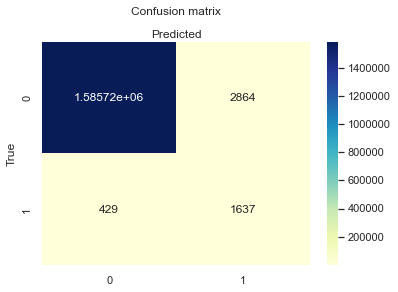

In [73]:
# plot confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [74]:
# Random forest approach

import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

# train model
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train, y_train)
# test model
y_pred = model.predict(X_test)
# print accuaracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9987011639859051
